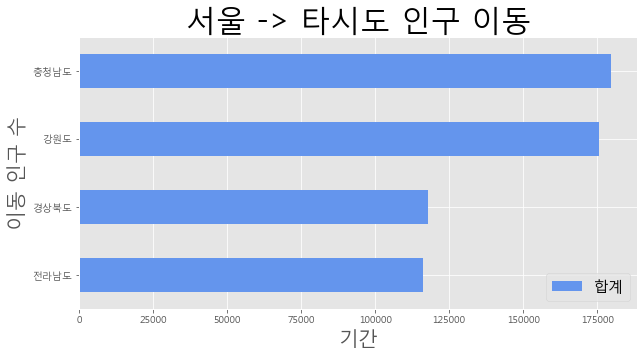

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path="./malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_excel('시도별 전출입 인구수.xlsx',fillna=0,header=0)

df=df.fillna(method='ffill')

mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)

col_years=list(map(str,range(2010,2018)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

df_4['합계']=df_4.sum(axis=1)

df_total=df_4[['합계']].sort_values(by='합계',ascending=True)

plt.style.use('ggplot')

df_total.plot(kind='barh',color='cornflowerblue',width=0.5,figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

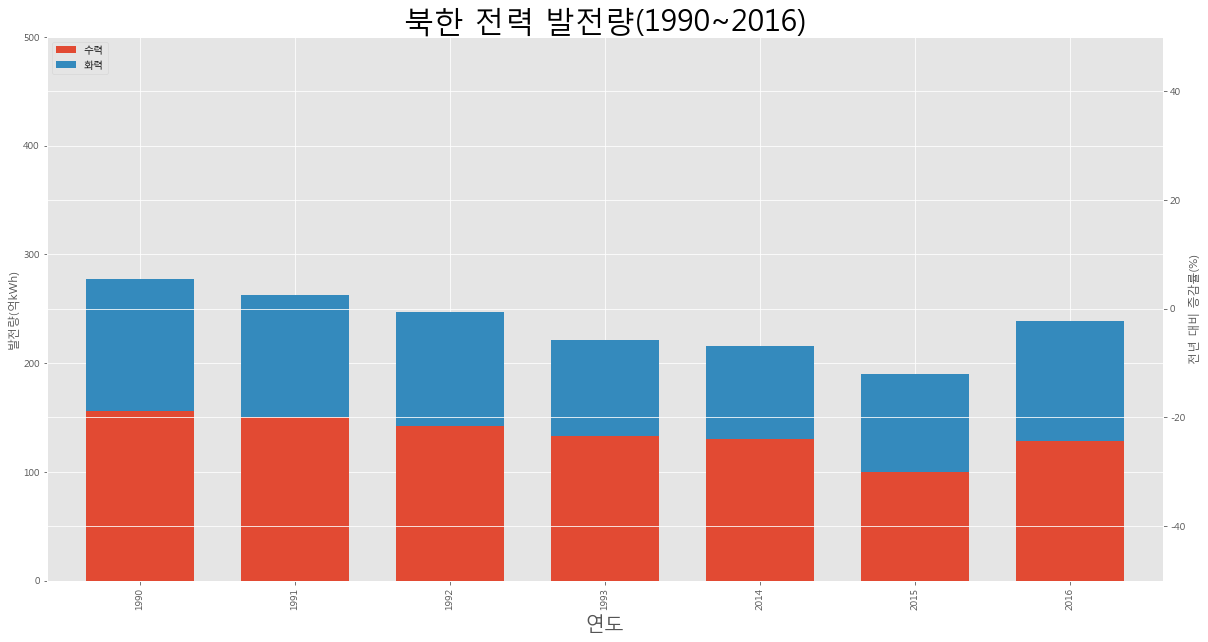

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path="./malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

df=pd.read_excel('./남북한발전전력량.xlsx',convert_float=True)
df=df.loc[5:9]
df.drop('전력량(억kWh)',axis='columns',inplace=True)
df.set_index('발전 전력별', inplace=True)
df=df.T

df=df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년']=df['총발전량'].shift(1)
df['증감률']=((df['총발전량']/df['총발전량 - 1년'])-1)*100

ax1=df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2=ax1.twinx()
ax2.plot(df.index,df.증감률,ls='--',marker='o',markersize=20,
        color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억kWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량(1990~2016)',size=30)
ax1.legend(loc='upper left')

plt.show()

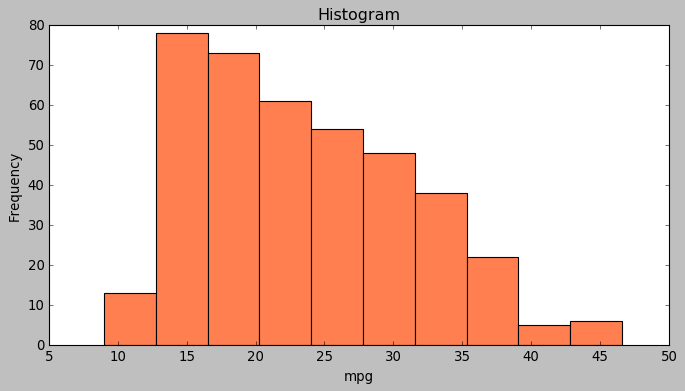

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

df['mpg'].plot(kind='hist',bins=10,color='coral',figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

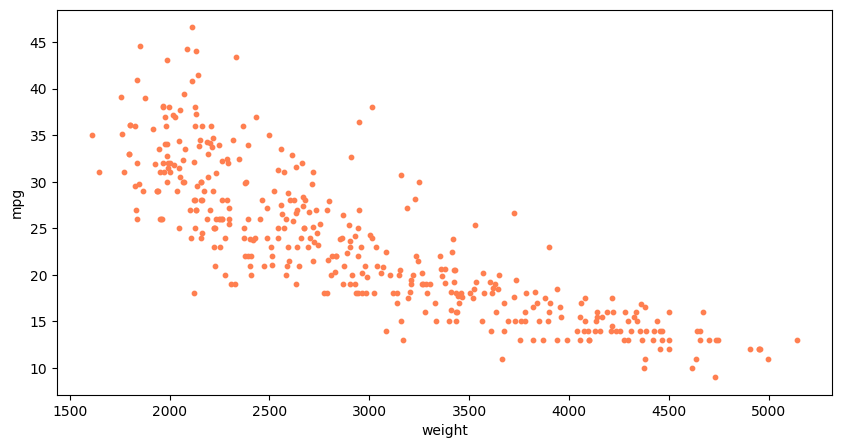

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))

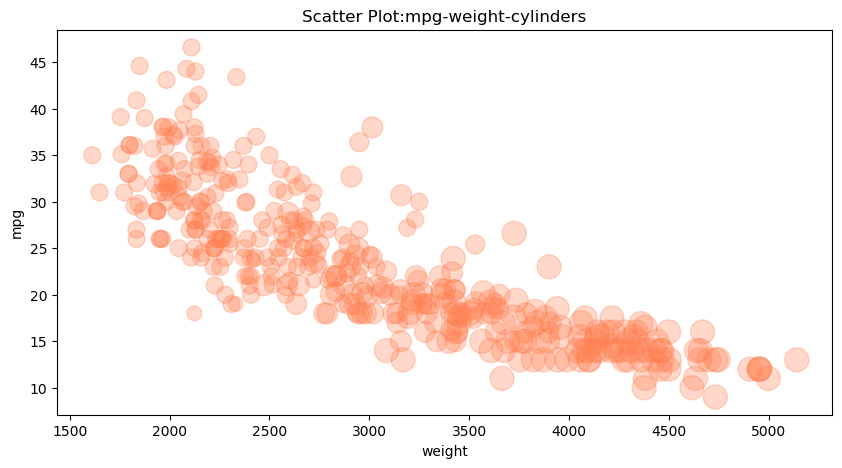

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

cylinders_size=df.cylinders/df.cylinders.max()*300

df.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5),
       s=cylinders_size,alpha=0.3)
plt.title('Scatter Plot:mpg-weight-cylinders')
plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


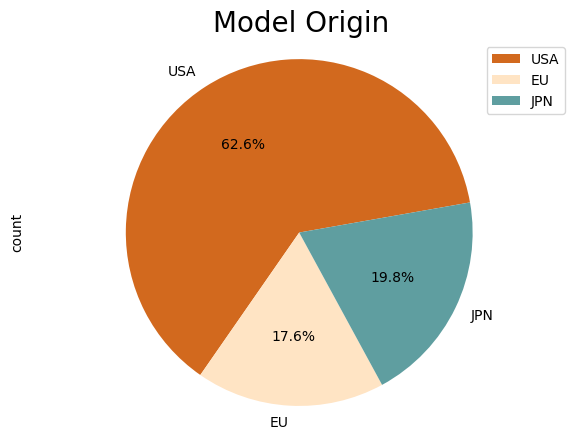

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

df['count']=1
df_origin=df.groupby('origin').sum()
print(df_origin.head())

df_origin.index=['USA','EU','JPN']

df_origin['count'].plot(kind='pie',figsize=(7,5),autopct='%1.1f%%',startangle=10,
                       colors=['chocolate','bisque','cadetblue'])

plt.title('Model Origin',size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index,loc='upper right')
plt.show()

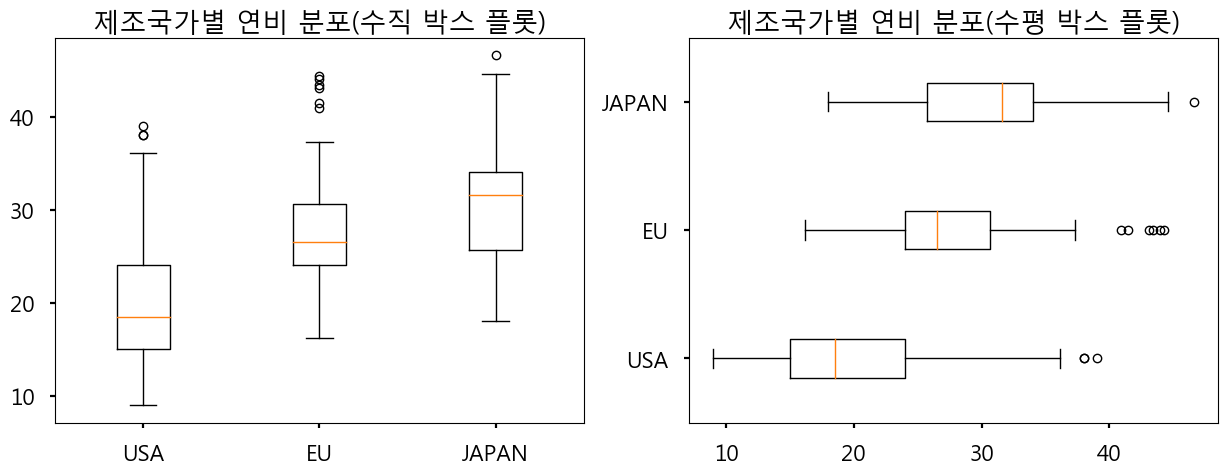

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path="./malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False

df=pd.read_csv('./auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','name']

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
           labels=['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
              df[df['origin']==2]['mpg'],
              df[df['origin']==3]['mpg']],
           labels=['USA','EU','JAPAN'],
           vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [13]:
import seaborn as sns

titanic=sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age      

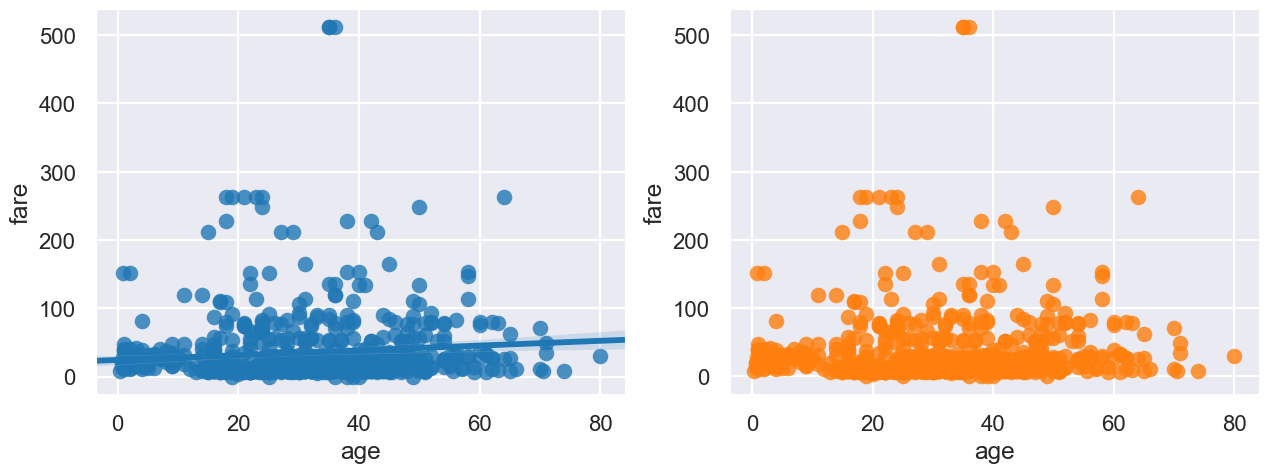

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.regplot(x='age',y='fare',data=titanic,ax=ax1)

sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)

plt.show()

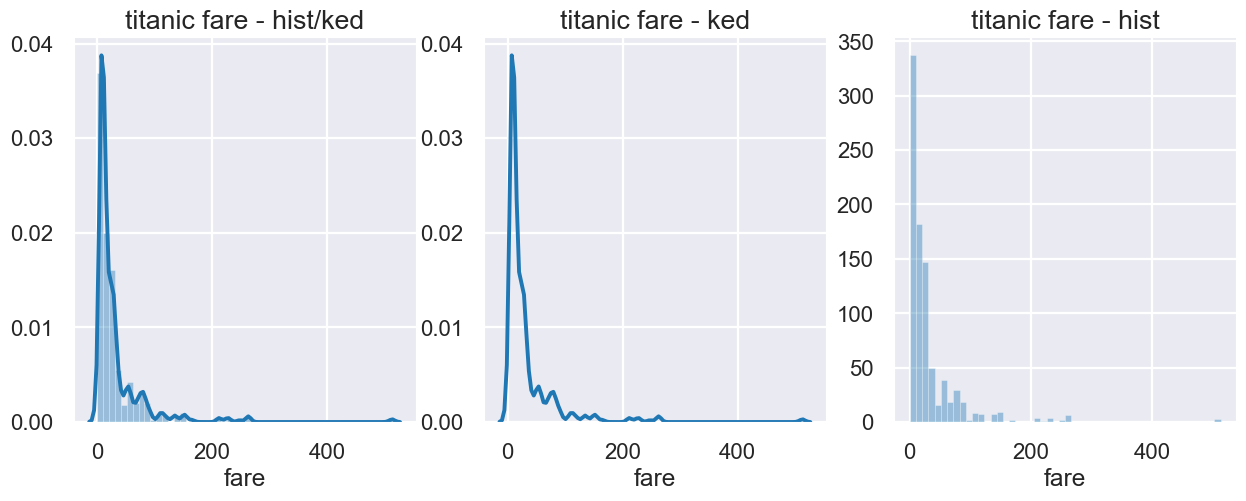

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'],ax=ax1)

sns.distplot(titanic['fare'],hist=False,ax=ax2)

sns.distplot(titanic['fare'],kde=False,ax=ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

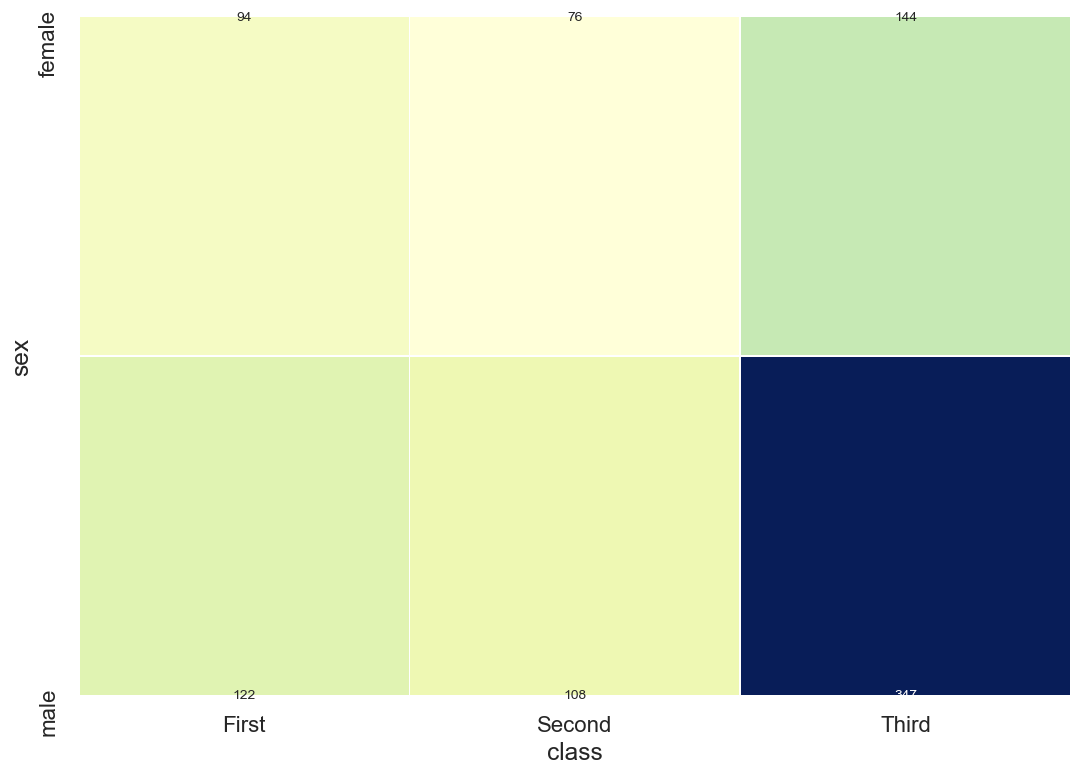

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('darkgrid')

table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')

sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=.5,cbar=False)

plt.show()

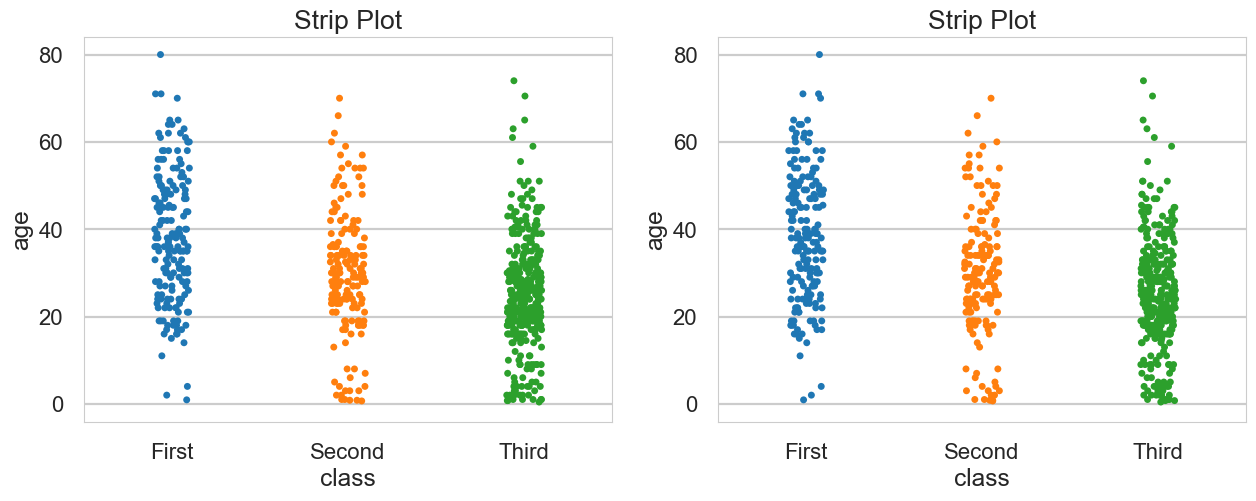

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.stripplot(x='class',y='age',data=titanic,ax=ax1)

sns.stripplot(x='class',y='age',data=titanic,ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

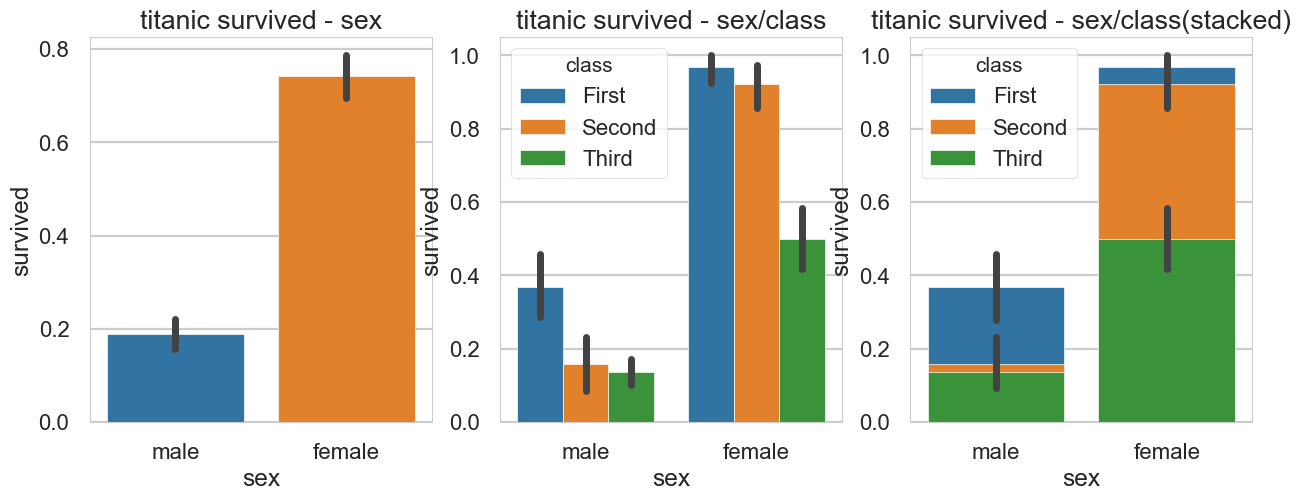

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)

sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)

sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

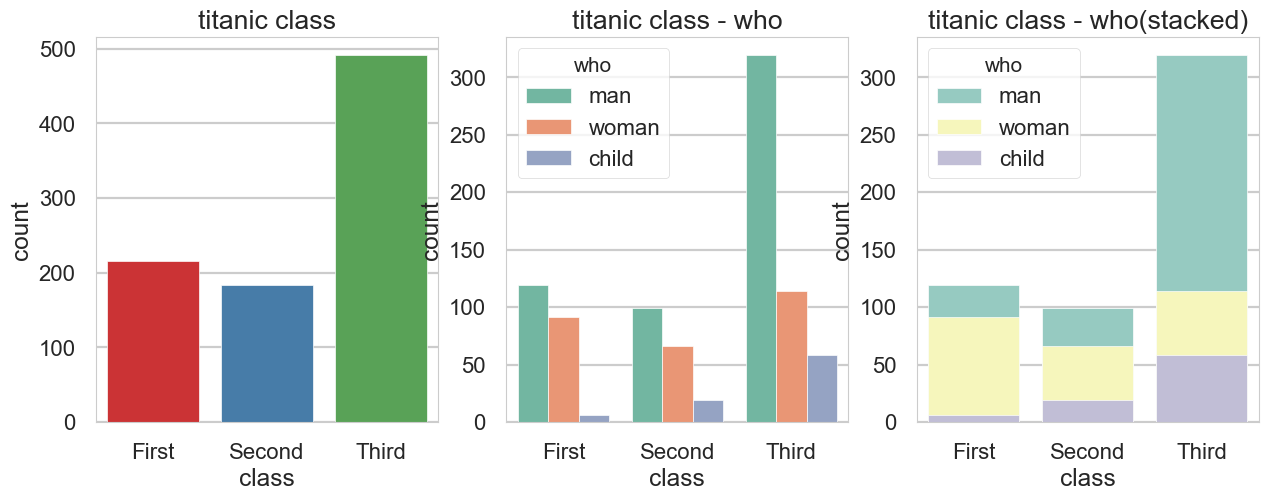

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)

sns.countplot(x='class',hue='who',palette='Set2',data=titanic,ax=ax2)

sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=titanic,ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

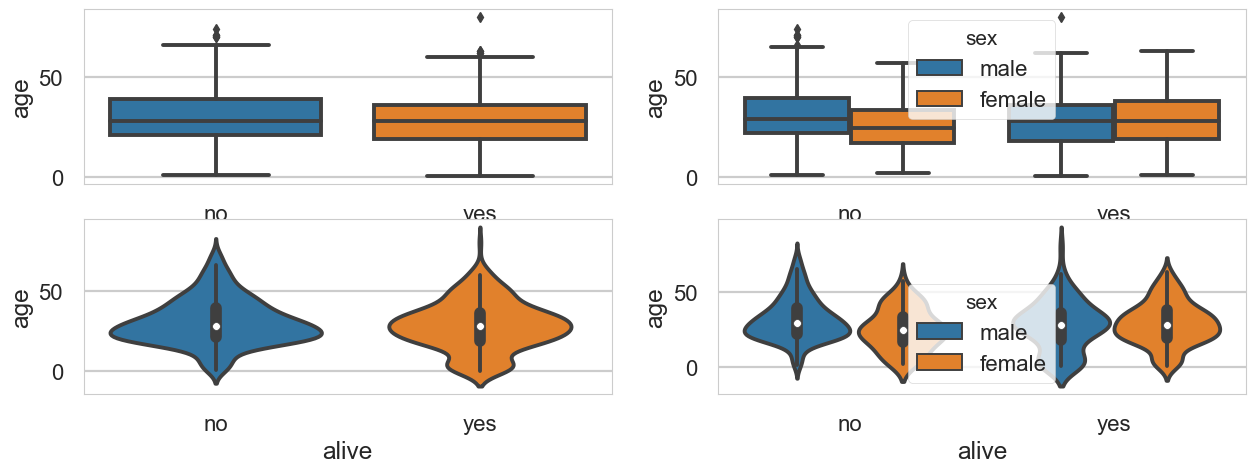

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)

sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax2)

sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)

sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4)

plt.show()

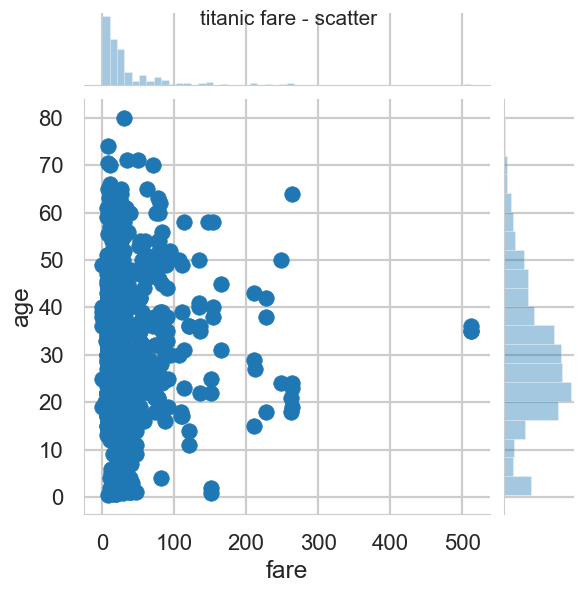

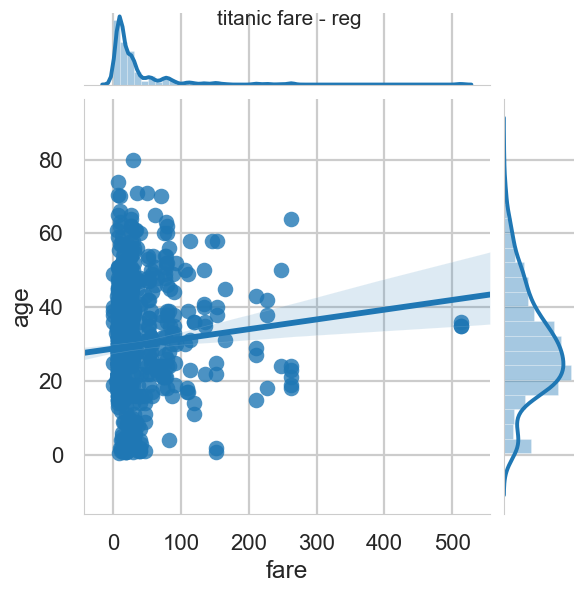

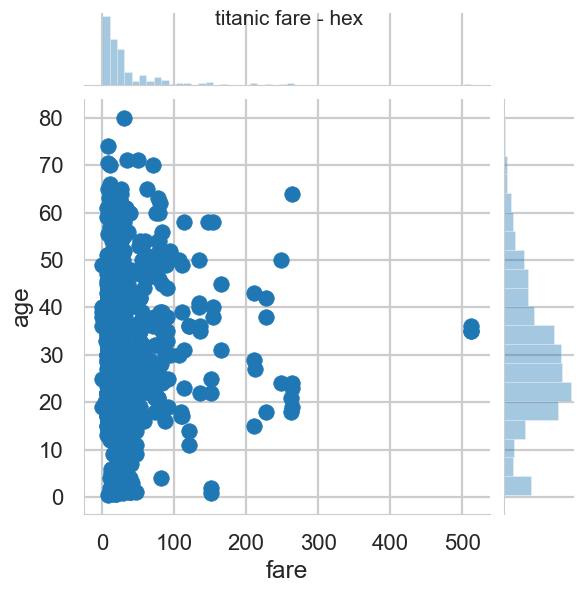

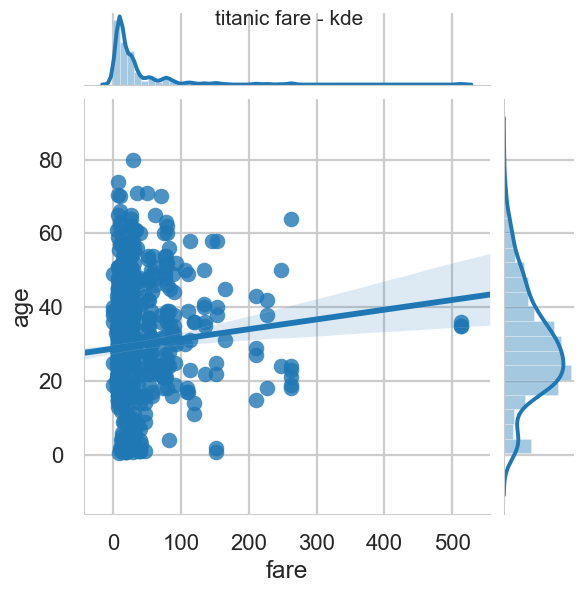

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

j1=sns.jointplot(x='fare',y='age',data=titanic)

j2=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)

j3=sns.jointplot(x='fare',y='age',data=titanic)

j4=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)

j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()

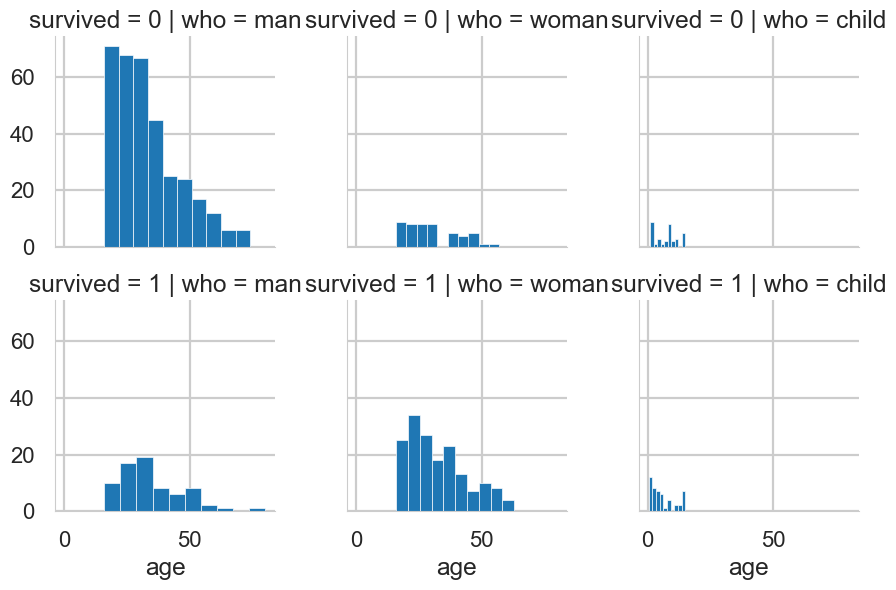

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

g=sns.FacetGrid(data=titanic,col='who',row='survived')

g=g.map(plt.hist,'age')

C:\Users\60415\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\60415\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


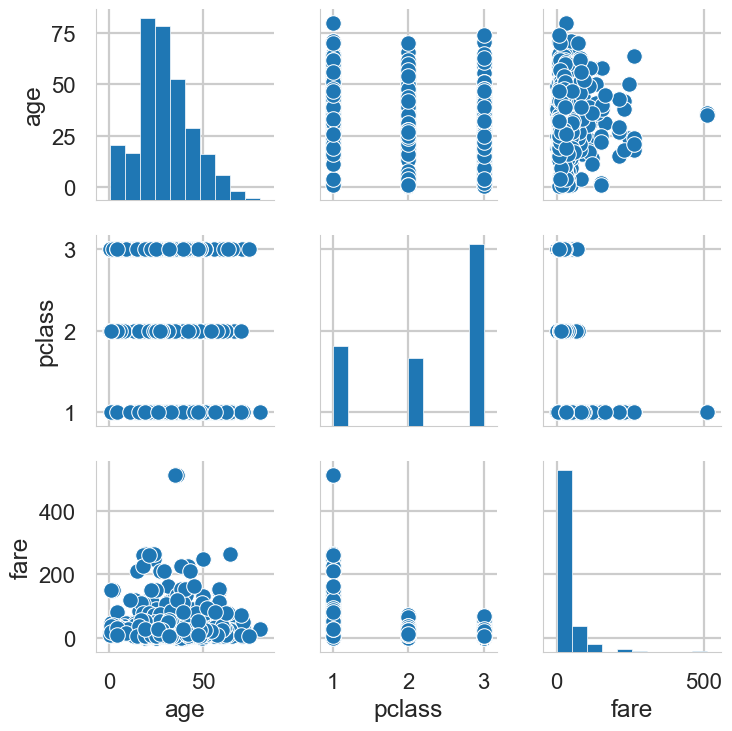

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

titanic_pair=titanic[['age','pclass','fare']]

g=sns.pairplot(titanic_pair)

In [34]:
import folium

seoul_map=folium.Map(location=[37.55,126.98],zoom_start=12)

seoul_map.save('./seoul.html')

In [36]:
import folium

seoul_map2=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                     zoom_start=12)
seoul_map3=folium.Map(location=[37.55,126.98],tiles='Stamen Toner',
                     zoom_start=15)

seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [37]:
import pandas as pd
import folium

df=pd.read_excel('./서울지역 대학교 위치.xlsx')

seoul_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                    zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map.save('./seoul_colleges.html')

In [38]:
import pandas as pd
import folium

df=pd.read_excel('./서울지역 대학교 위치.xlsx')

seoul_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                    zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat,lng],radius=10,color='brown',fill=True,
                        fill_color='coral',fill_opacity=0.7,popup=name
                       ).add_to(seoul_map)

seoul_map.save('./seoul_colleges2.html')

In [39]:
import pandas as pd
import folium
import json

file_path='./경기도인구데이터.xlsx'
df=pd.read_excel(file_path,index_col='구분')
df.columns=df.columns.map(str)

geo_path='./경기도행정구역경계.json'
try:
    geo_data=json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data=json.load(open(geo_path,encoding='utf-8-sig'))
    
g_map=folium.Map(location=[37.5502,126.982],
                tiles='Stamen Terrain',zoom_start=9)

year='2007'

folium.Choropleth(geo_data=geo_data, data=df[year],
                 columns=[df.index,df[year]],
                  fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.3,
                 threshold_scale=[10000,100000,300000,500000,700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

g_map.save('./gyonggi_population_'+year+'.html')

In [42]:
import seaborn as sns

df=sns.load_dataset('titanic')

nan_deck=df['deck'].value_counts(dropna=False)
print(nan_deck)

print(df.head().isnull())

print(df.head().notnull())

print(df.head().isnull().sum(axis=0))

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64
   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  
   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    T

In [43]:
import seaborn as sns

df=sns.load_dataset('titanic')

missing_df=df.isnull()
for col in missing_df.columns:
    missing_count=missing_df[col].value_counts()
    
    try:
        print(col,': ',missing_count[True])
    except:
        print(col,': ',0)

df_thresh=df.dropna(axis=1,thresh=500)
print(df_thresh.columns)

df_age=df.dropna(subset=['age'],how='any',axis=0)
print(len(df_age))

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')
714


In [44]:
import seaborn as sns

df=sns.load_dataset('titanic')

print(df['age'].head(10))
print('\n')

mean_age=df['age'].mean(axis=0)
df['age'].fillna(mean_age,inplace=True)

print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [ ]:
import seaborn as sns

df=sns.load_dataset('titanic')